In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score

# TODO START

In [2]:
# TODO fetch dataset и разделение

X,y = load_breast_cancer(as_frame=True, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

load_breast_cancer()['feature_names'], load_breast_cancer()['target'].shape



(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 (569,))


**scatterplot два варианта**

    * 30 признаков много, делаем PCA

In [ ]:
# TODO scatter

fig, (axis1, axis2)= plt.subplots(1, 2, figsize=(8, 4))
axis1.scatter(X['perimeter error'], X['mean radius'], c=y, cmap="coolwarm", s=10)
# plt.show()

sns.scatterplot(x=X['perimeter error'], y=X['mean radius'], hue=y, size=7, ax=axis2)
plt.show()

In [3]:
# TODO StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SVC linear - meshgrid**

** `Z = svc_line.predict(np.c_[xx.ravel(), yy.ravel()])` -- Объяснение**

   * Взяли из `обученной` модели `svc_line` предсказания по классам,`отобразили` их на массив сетки `np.c_[xx.ravel(), yy.ravel()] ` и получили `предсказания` на `координатах` сетки — как результат `получаем границу`*

Accuracy 30D : 0.956140350877193
Classification report 30D :
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

roc_auc_score 30D :
 0.9963969865705863
f1_score 30D :
 0.9645390070921985
f1_score 2D :
 0.993006993006993


((455, 2), array([1, 0, 0, 1, 1]))

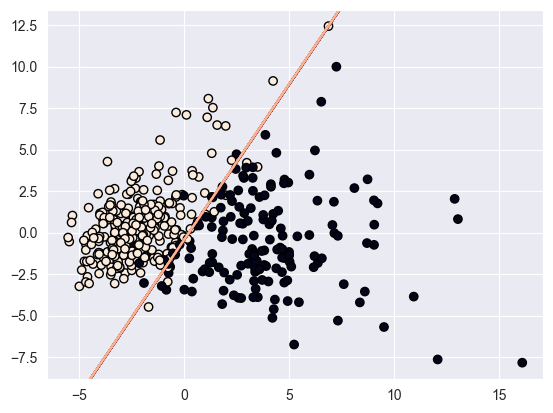

In [4]:
# TODO SVC linear по 30 признакам

svm_line = SVC(C=1.0, kernel='linear', probability=True, random_state=42)

svm_line.fit(X_train, y_train)

y_pred_ln = svm_line.predict(X_test)
y_score_ln = svm_line.predict_proba(X_test)

# TODO Качество
print("Accuracy 30D :", accuracy_score(y_test, y_pred_ln))
print("Classification report 30D :\n", classification_report(y_test, y_pred_ln))
print("roc_auc_score 30D :\n",roc_auc_score(y_test, y_score_ln[:, 1]))
print("f1_score 30D :\n",f1_score(y_test, y_pred_ln))


# TODO Компонента
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.transform(X_test)

# TODO SVC linear по 2 компонентам
svc_line = SVC(C=1.0, kernel='linear', probability=True, random_state=42)

svc_line.fit(X_train_pca, y_train)

# TODO SVC linear по 2 признакам
X_test_2 = svc_line.predict(X_test_pca)


# TODO Построение границы  и scatter модели
# step size in the mesh
h = 0.02

# create a mesh to plot in
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors="black")

# TODO Отображаем на координаты сетки предсказание модели svc_line
Z = svc_line.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z )  # Построение границы

print("f1_score 2D :\n",f1_score(y_test, X_test_2))
X_train_pca.shape, X_test_2[:5]
# X_train_pca[:5]

**SVC rbf**

**Построение границы на 30 признаках через уменьшение размерности**

Accuracy: 0.9824561403508771
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

roc_auc_score :
 0.99737962659679
f1_score :
 0.9861111111111112


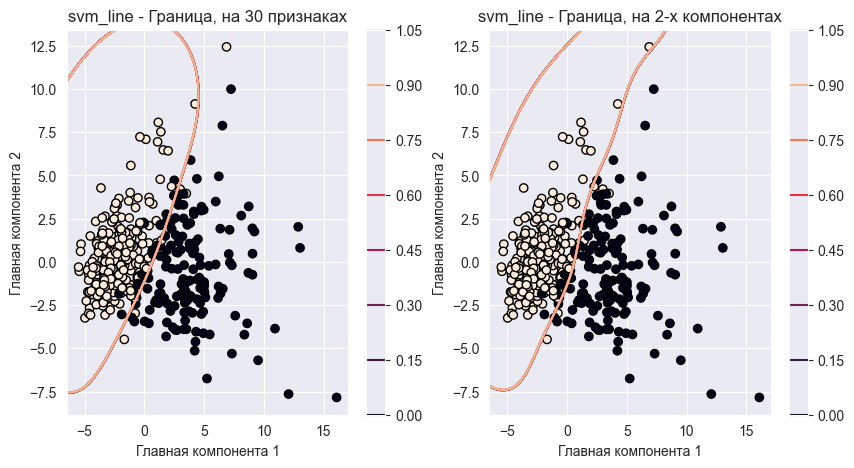

In [5]:
# TODO SVC rbf по 30 признакам

svm_line = SVC(C=1.0, kernel='rbf', probability=True, random_state=42)

svm_line.fit(X_train, y_train)

y_pred_rbf = svm_line.predict(X_test)
y_score_rbf = svm_line.predict_proba(X_test)

# y_score_rbf[:5]

print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Classification report:\n", classification_report(y_test, y_pred_rbf))
print("roc_auc_score :\n",roc_auc_score(y_test, y_score_rbf[:, 1]))
print("f1_score :\n",f1_score(y_test, y_pred_rbf))

# TODO Компонента
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.transform(X_test)



# TODO SVC rbf по 2 компонентам
svc_line = SVC(C=1.0, kernel='rbf', probability=True, random_state=42)

svc_line.fit(X_train_pca, y_train)

# TODO Построение границы  и scatter модели
# step size in the mesh
h = 0.02

# Используем одна сетка для обоих построений
# create a mesh to plot in
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


# Обратное преобразование из 2D в 30D
# TODO Преобразование точек сетки обратно в исходное пространство признаков, 30 признаков
meshgrid_original = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])

axis1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors="black")  # Построение точек из 2D

# TODO Отображаем на координаты сетки предсказание модели svm_line
Z = svm_line.predict(meshgrid_original)
Z = Z.reshape(xx.shape)

contour1 = axis1.contour(xx, yy, Z )  # Построение границы

axis1.set_xlabel('Главная компонента 1')
axis1.set_ylabel('Главная компонента 2')
axis1.set_title('svm_line - Граница, на 30 признаках')
# colorbar
plt.colorbar(contour1, ax=axis1)
# plt.show()

axis2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors="black") # Построение точек из 30D

# TODO Отображаем на координаты сетки предсказание модели svc_line
Z = svc_line.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contour2  = axis2.contour(xx, yy, Z )  # Построение границы
,
axis2.set_xlabel('Главная компонента 1')
axis2.set_ylabel('Главная компонента 2')
axis2.set_title('svm_line - Граница, на 2-х компонентах')
# colorbar
plt.colorbar(contour2, ax=axis2)
plt.show()

**Построение границы на 2-х компонентах**

In [ ]:
# TODO SVC rbf по 2 компонентам
svc_line = SVC(C=1.0, kernel='rbf', probability=True, random_state=42)

svc_line.fit(X_train_pca, y_train)

# TODO Построение границы  и scatter модели
# step size in the mesh
h = 0.02

# create a mesh to plot in
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors="black")

# TODO Отображаем на координаты сетки предсказание модели svc_line
Z = svc_line.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z )  # Построение границы

plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('svm_line - Граница, на 2-х компонентах')
plt.colorbar(label='Class')
plt.show()

**LogReg**

Accuracy: 0.9385964912280702
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.92      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114

roc_auc_score :
 0.9818211595152309
f1_score :
 0.948905109489051
f1_score 2D :
 0.993006993006993


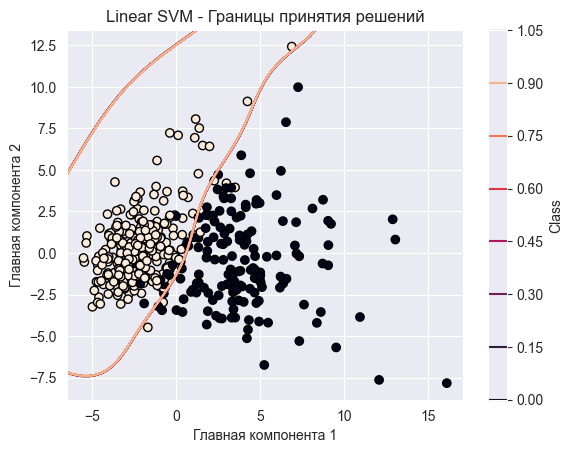

(114,) (114,)


In [7]:
# TODO LogReg по 30 признакам

logreg = LogisticRegression(penalty=None, random_state=42)

logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)
y_score_log = logreg.predict_proba(X_test)


# y_score_log[:5]

print("Accuracy 30D :", accuracy_score(y_test, y_pred_log))
print("Classification report 30D :\n", classification_report(y_test, y_pred_log))
print("roc_auc_score 30D :\n",roc_auc_score(y_test, y_score_log[:, 1]))
print("f1_score 30D :\n",f1_score(y_test, y_pred_log))


# TODO Компонента
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.transform(X_test)


# TODO LogReg по 2 компонентам
logreg_pca = LogisticRegression(penalty=None, random_state=42)

logreg_pca.fit(X_train_pca, y_train)

y_pred_pca = logreg_pca.predict(X_test_pca)

# TODO f1_score по 2 компонентам
print("f1_score 2D :\n",f1_score(y_test, y_pred_pca))

# TODO Построение границы  и scatter модели
# step size in the mesh
h = 0.02

# create a mesh to plot in
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors="black")

# TODO Отображаем на координаты сетки предсказание модели logreg
Z = svc_line.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z )  # Построение границы

plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Linear SVM - Границы принятия решений')
plt.colorbar(label='Class')
plt.show()

print(y_test.shape, y_pred_log.shape)

**LogReg Polinomial**

In [ ]:
# TODO LogReg Polinomial

# logreg_poly = LogisticRegression()

# logreg.fit(X_train, y_train)
# 
# y_pred_log = logreg.predict(X_test)
# y_score_log = logreg.predict_proba(X_test)

**pipe_line**
   * make_pipeline
      * Автоматически создаёт имена шагов (например, standardscaler, ridge)
   * Pipeline
      * В ручную задаём имена шагов (например, 'reg')

Accuracy: 0.9912280701754386
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

roc_auc_score :
 0.998689813298395
f1_score :
 0.993006993006993
(114,) (114, 2) (114, 2)


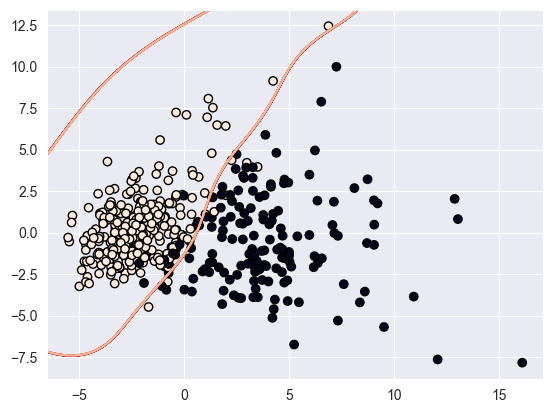

In [12]:
# TODO pipe_line Polinomial LogReg  на 30 признаках


# TODO Компонента
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.transform(X_test)


# TODO make_pipeline Polynomial_LogReg на 2-х компонентах
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2), LogisticRegression(penalty=None))

# TODO Pipeline
# pipe = Pipeline(steps = [('StandardScaler', StandardScaler()),('PolynomialFeatures', PolynomialFeatures(degree=2)), ('LogisticRegression', LogisticRegression(penalty=None))])

log_poly = pipe.fit(X_train_pca, y_train)

# y_pred_poly = logreg.predict(X_test)
# y_score_poly = logreg.predict_proba(X_test)

y_pred_poly = pipe.predict(X_test_pca)
y_score_poly = pipe.predict_proba(X_test_pca)

print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Classification report:\n", classification_report(y_test, y_pred_poly))
print("roc_auc_score :\n",roc_auc_score(y_test, y_score_poly[:, 1]))
print("f1_score :\n",f1_score(y_test, y_pred_poly))
print(y_test.shape, X_test_pca.shape, y_score_poly.shape)



# TODO LogReg по 2 компонентам
# logreg_pca = LogisticRegression(penalty=None, random_state=42)
# 
# logreg_pca.fit(X_train_pca, y_train)

# TODO Построение границы  и scatter модели
# step size in the mesh
h = 0.02

# create a mesh to plot in
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors="black")

# TODO Отображаем на координаты сетки предсказание модели logreg
Z = svc_line.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z )  # Построение границы



**Метрики качества моделей: `SVC linear`,` SVC rbf`, `LogReg`, `Polinomial LogReg`**

In [9]:
# TODO result

# print("Accuracy:", accuracy_score(y_test, y_pred_ln))
# print("Classification report:\n", classification_report(y_test, y_pred_ln))
# print("roc_auc_score :\n",roc_auc_score(y_test, y_score_ln[:, 1]))
# print("f1_score :\n",f1_score(y_test, y_pred_ln))
# 
# print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
# print("Classification report:\n", classification_report(y_test, y_pred_rbf))
# print("roc_auc_score :\n",roc_auc_score(y_test, y_score_rbf[:, 1]))
# print("f1_score :\n", f1_score(y_test, y_pred_rbf))
# 
# print("Accuracy:", accuracy_score(y_test, y_pred_log))
# print("Classification report:\n", classification_report(y_test, y_pred_log))
# print("roc_auc_score :\n",roc_auc_score(y_test, y_score_log[:, 1]))
# print("f1_score :\n", f1_score(y_test, y_pred_log))



print("Accuracy : \n", ' linear -> ', accuracy_score(y_test, y_pred_ln), '; rbf -> ', accuracy_score(y_test, y_pred_rbf), '; logreg -> ', accuracy_score(y_test, y_pred_log), '; poly -> ', accuracy_score(y_test, y_pred_poly))

print("Classification report : \n", ' linear -> ', classification_report(y_test, y_pred_ln), '; rbf -> ', classification_report(y_test, y_pred_rbf), '; logreg -> ', classification_report(y_test, y_pred_log), '; poly -> ',  classification_report(y_test, y_pred_poly))

print("roc_auc_score :\n",  ' linear -> ', roc_auc_score(y_test, y_score_ln[:, 1]),  '; rbf -> ', roc_auc_score(y_test, y_score_rbf[:, 1]),  '; logreg -> ', roc_auc_score(y_test, y_score_log[:, 1]), '; poly -> ',  roc_auc_score(y_test, y_score_poly[:, 1]))

print("f1_score :\n",  ' linear -> ', f1_score(y_test, y_pred_ln),   '; rbf -> ', f1_score(y_test, y_pred_rbf),  '; logreg -> ', f1_score(y_test, y_pred_log), '; poly -> ',  f1_score(y_test, y_pred_poly))

Accuracy : 
  linear ->  0.956140350877193 ; rbf ->  0.9824561403508771 ; logreg ->  0.9385964912280702 ; poly ->  0.9912280701754386
Classification report : 
  linear ->                precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114
 ; rbf ->                precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114
 ; logreg ->                precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.92      0.9